In [1]:
#%%
import math
import numpy as np
import inspect
import importlib

import scipy.interpolate

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.offline import plot
pio.renderers.default = "svg"

import sys
import os
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
#sys.path.append(os.path.dirname(parent_directory))
#sys.path.append(os.path.dirname(os.path.dirname(parent_directory)))

from IoT_node_models.Energy_model                        import *
from IoT_node_models.Energy_model.Wireless_communication import *
from IoT_node_models.Hardware_Modules import *
import LoRaNode_analysis as nd

path_to_save_svg = "Saved_Data"



Importing IoT Node models
Importing IoT Node Energy models
Importing IoT Node Energy models
Importing Wireless communication packages
Importing Wireless communication packages
Importing custom modules data
Importing custom modules data


In [13]:
node_LDO = LDO(name = "Node LDO", v_out = 3.3, i_q = 1e-3, v_in = 3.3, module_list = module_List_3V3)
node_Batt= Battery(name = "Node Batt.", v = 3.3, capacity_mAh = 1800, i = 0, selfdischarge_p_year = 5)

node_lora = LoRa_Node(name= "IoT Node", module_list= module_List_3V3, PMU_composition =[node_LDO], Battery = node_Batt, MCU_module   = apollo_module_3V3, radio_module = radio_module_3V3)

node = LoRa_Node_profile("Node_profile", node_lora, MCU_active_state = apollo_state_active_3V3,
                radio_state_TX=radio_state_TX_3V3, radio_state_RX= radio_state_RX_3V3, Ptx = 2)
                
    

node.set_radio_parameters(SF=7 ,Coding=1,Header=True,DE = None,BW = 125e3, Payload = 50) 
node.set_TX_Power_config( P_TX= PTX_PABOOST_configured, I_TX=I_PABoost_3V3)  
node.set_TX_Power(Ptx = 17)
node.change_RX_duration(1e-3)

node.change_task_rate(node.task_rx,0)#24*60*(60/6))
node.change_task_rate(node.task_tx,24*4)
node.add_task(task_TPHG_3V3,24*12)

In [14]:
def PL_model(d):
    return path_loss_PLd0(d=d, PLd0=94.40,d0=1, n=2.03)

node.set_Path_loss_model(PL_model)

In [4]:
figsize = (6,5)

-------------------------------------------------
            Tasks summary                        
-------------------------------------------------
Task name            : Sleep          TX             RX             TPHG meas.     
Times/day    [1/d]   : 1              96             0              288            
Tot. durat.  [s]     : 85521.4138     249.7874       0.0000         628.7988       
Tot. en./d   [mJ]    : 10194.8623     64856.2648     0.0000         23488.9315     
Node en./d   [mJ]    : 98540.0585      
Average pow. [mW]    : 1.1405          
-------------------------------------------------
-----------------------------------------------------------------
                        Module summary                           
-----------------------------------------------------------------
Module       State        Active [s]   Energy [mJ]  Av. Cur.[uA]  
Apollo3                   644.1607     1988.2435    6.9734        
     -       Sleep        85755.8393   770.2000     

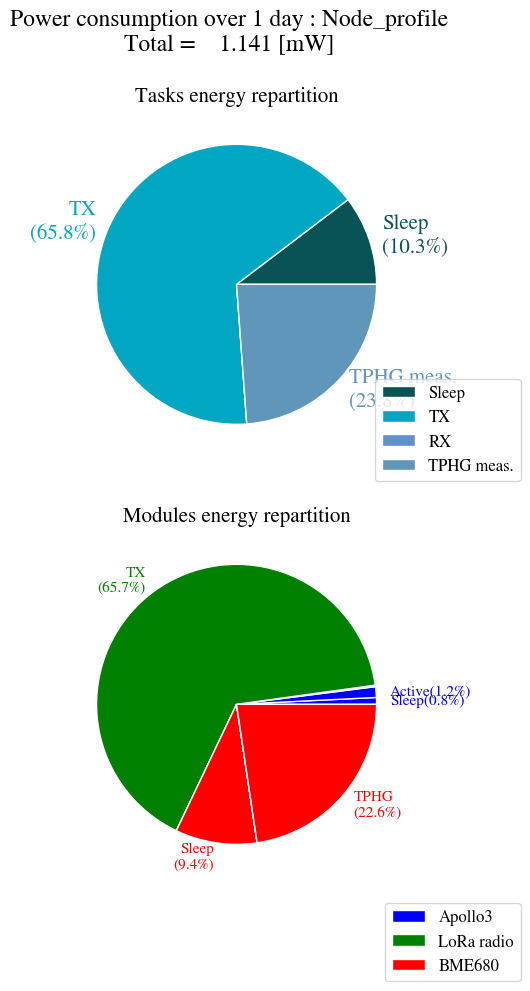

In [15]:
node.set_distance( d= 1500,recompute=True)
node.print_Tasks()
node.print_Modules()
node.plot_Power()

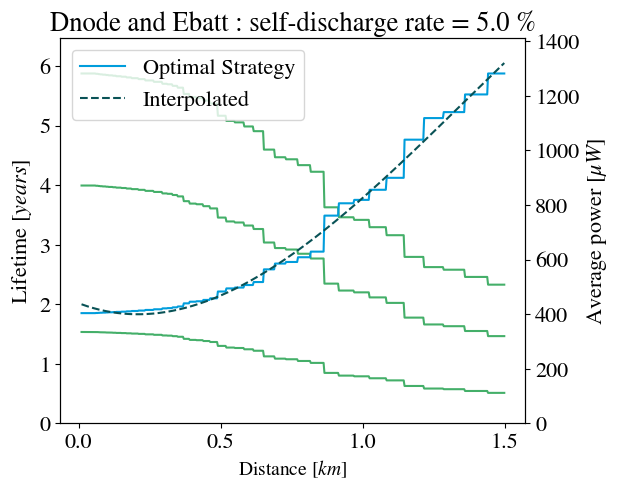

In [16]:
node.set_TX_Power_config( P_TX= PTX_PABOOST_3V3, I_TX=I_PABoost_3V3)  
nd.sweep_dnode(Node=node, 
            dmax=1500, 
            d_step=3 ,
            nAA = [1,3,5],
            PL_model=PL_model, 
            filename =os.path.join(path_to_save_svg , "Lifetime_dnode_Ebatt"),
            figsize=figsize)


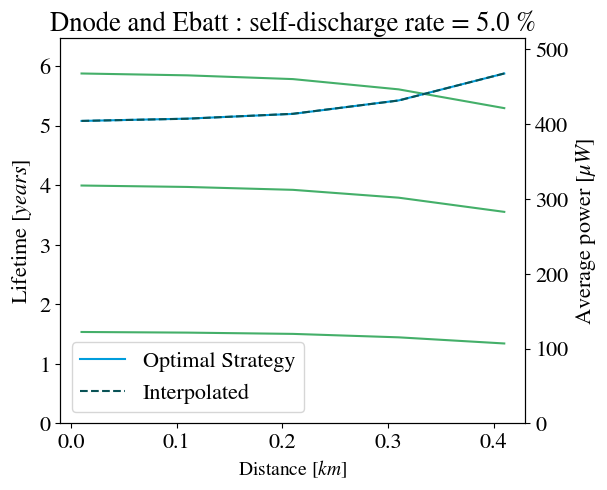

In [17]:
node.set_TX_Power_config( P_TX= PTX_PABOOST_configured[:15], I_TX=I_PABoost_3V3[:15])  
nd.sweep_dnode(Node=node, 
            dmax=500, 
            d_step=100 ,
            nAA = [1,3,5],
            PL_model=PL_model, 
            filename =os.path.join(path_to_save_svg , "Lifetime_dnode_Ebatt2"),
            figsize=figsize)

node.set_TX_Power_config( P_TX= PTX_PABOOST_3V3  , I_TX=I_PABoost_3V3)  


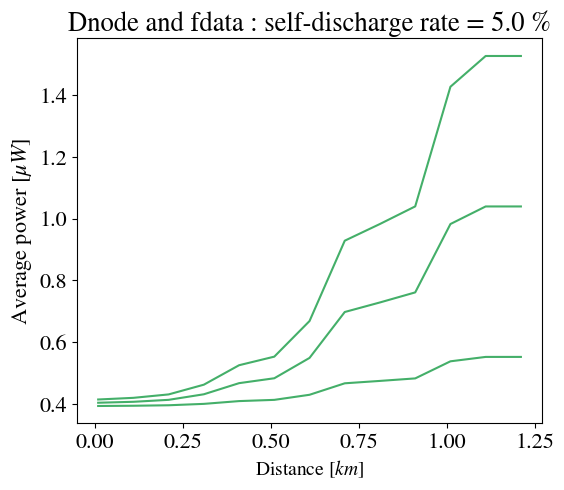

In [18]:
node.set_TX_Power_config( P_TX= PTX_PABOOST_configured[:15], I_TX=I_PABoost_3V3[:15])  
nd.sweep_dnode_fdata(Node=node, 
                    dmax=1300, 
                    d_step=100,
                    fdata = [24,24+3*24,24+6*24], 
                    Task_tx = node.task_tx,
                    PL_model=PL_model, 
                    filename =os.path.join(path_to_save_svg , "Lifetime_dnode_fdata"),
                    figsize=figsize)

node.set_TX_Power_config( P_TX= PTX_PABOOST_3V3, I_TX=I_PABoost_3V3) 

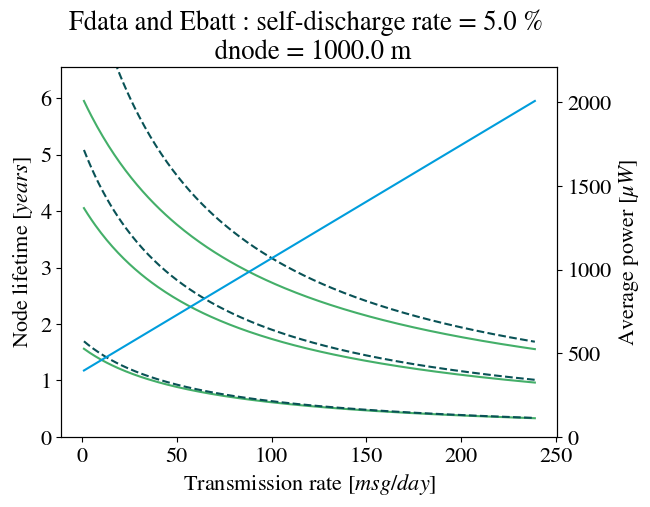

In [19]:
nd.sweep_fdata(Node=node, 
            fmax=24*10, 
            f_step=1, 
            Task_tx = node.task_tx,
            d = 1000,
            nAA = [1,3,5],
            PL_model=PL_model, 
            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt"),
            figsize=figsize) 
    

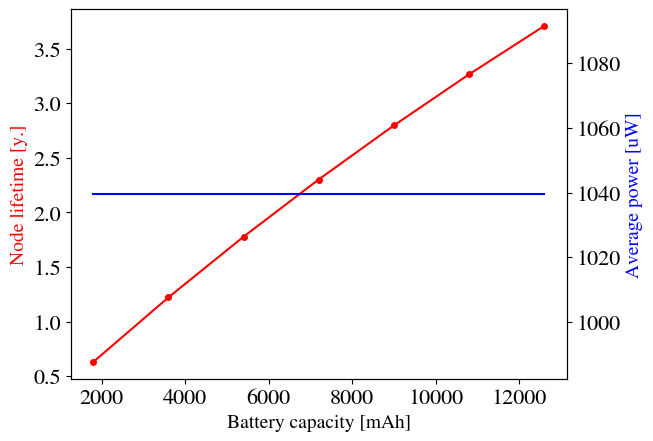

In [20]:
nd.sweep_ebatt(Node=node, 
                nAAmax = 8,
                d = 1300,
                PL_model=PL_model)
    

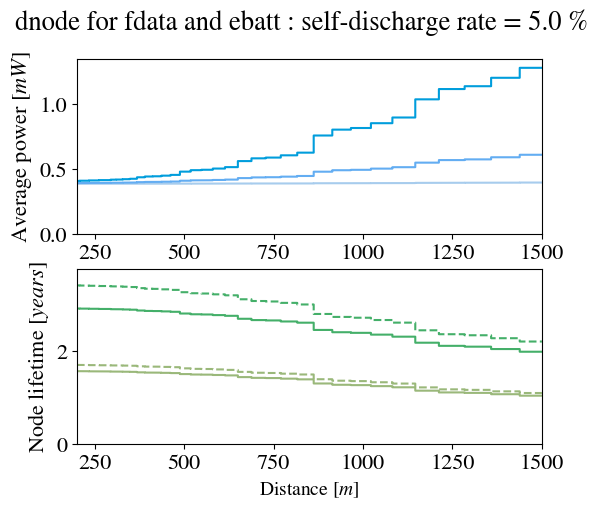

In [21]:
node.set_TX_Power_config( P_TX= PTX_PABOOST_3V3, I_TX=I_PABoost_3V3) 
nd.sweep_dnode_fdata_Ebatt( Node=node,
                            dmin = 200, 
                            dmax=1500, 
                            d_step=2,
                            f_batt = 24,
                            fdata = [1,24, 24*4],
                            nAA = [1,2], 
                            Task_tx = node.task_tx, 
                            PL_model=PL_model, 
                            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt_dnode"),
                            figsize=figsize) 
    

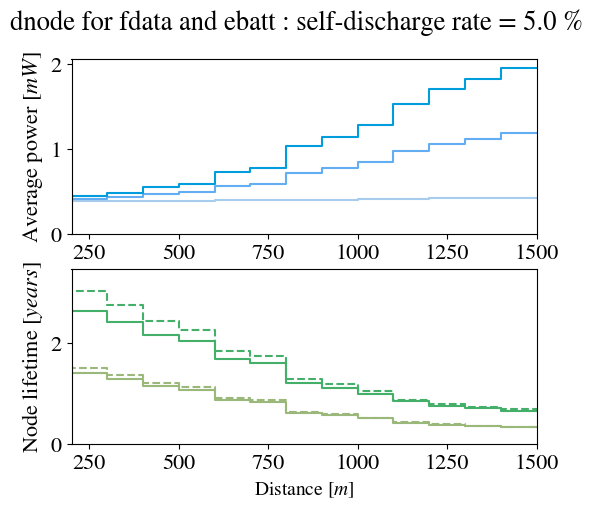

In [22]:
node.set_TX_Power_config( P_TX= PTX_PABOOST_3V3, I_TX=I_PABoost_3V3) 
nd.sweep_dnode_fdata_Ebatt( Node=node,
                            dmin = 200, 
                            dmax=1500, 
                            d_step=100,
                            f_batt = 24*7,
                            fdata = [4,86,168],
                            nAA = [1,2], 
                            Task_tx = node.task_tx, 
                            PL_model=PL_model, 
                            filename =os.path.join(path_to_save_svg , "Lifetime_fdata_Ebatt_dnode"),
                            figsize=figsize) 
